In [6]:
import pandas as pd

file_path = '..\data\crime\police_recorded_offences\\'
columns_to_include = ['geo', 'TIME_PERIOD', 'OBS_VALUE']

df_homicide = pd.read_csv(file_path+"homicide.csv", usecols=columns_to_include)
df_rape = pd.read_csv(file_path+"rape.csv", usecols=columns_to_include)
df_sexual_assault = pd.read_csv(file_path+"sexual_assault.csv", usecols=columns_to_include)
df_sexual_violence = pd.read_csv(file_path+"sexual_violence.csv", usecols=columns_to_include)
df_theft = pd.read_csv(file_path+"theft.csv", usecols=columns_to_include)

df_homicide.isnull().sum().sum(), df_rape.isnull().sum().sum(), df_sexual_assault.isnull().sum().sum(), df_sexual_violence.isnull().sum().sum(), df_theft.isnull().sum().sum()

(0, 0, 0, 0, 0)

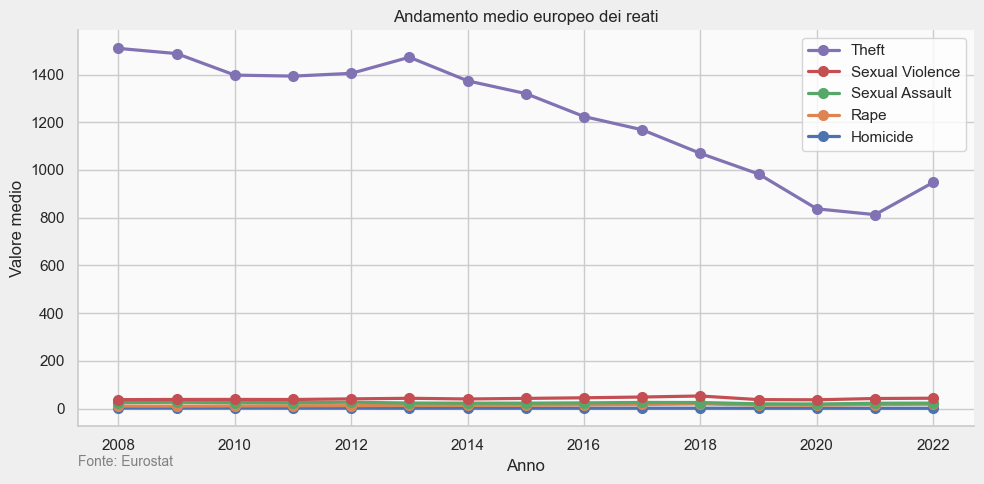

In [50]:
import matplotlib.pyplot as plt

dfs = [
    (df_homicide, 'Homicide'),
    (df_rape, 'Rape'),
    (df_sexual_assault, 'Sexual Assault'),
    (df_sexual_violence, 'Sexual Violence'),
    (df_theft, 'Theft')
]

palette = {
    'Homicide': '#ff8383',        # Viola scuro, per gravità
    'Rape': '#cb83ff',            # Rosso tenue, associato al pericolo
    'Sexual Assault': '#ff83f9',  # Arancione tenue, per visibilità
    'Sexual Violence': '#cab2d6', # Lilla chiaro, meno aggressivo
    'Theft': '#9d83ff'            # Verde scuro, per neutralità
}

plt.figure(figsize=(10,5))


for df, label in dfs:
    # Rimuovo eventuali NaN e raggruppo per anno facendo la media su tutte le nazioni
    df_mean = df.dropna(subset=['OBS_VALUE']).groupby('TIME_PERIOD', as_index=False)['OBS_VALUE'].mean().sort_values('TIME_PERIOD')
    if not df_mean.empty:
        plt.plot(df_mean['TIME_PERIOD'], df_mean['OBS_VALUE'], marker='o', label=label, linewidth=2.3, markersize=7)

plt.title('Andamento medio europeo dei reati')
plt.xlabel('Anno')
plt.ylabel('Valore medio')
plt.grid(True)


custom_legend_order = ['Theft', 'Sexual Violence', 'Sexual Assault', 'Rape', 'Homicide' ]
handles, labels = plt.gca().get_legend_handles_labels()
sorted_handles_labels = sorted(zip(handles, labels), key=lambda x: custom_legend_order.index(x[1]))
handles, labels = zip(*sorted_handles_labels)
plt.legend(handles, labels)

ax = plt.gca()
# Rimozione dei bordi del grafico
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

plt.gcf().set_facecolor("#efefef")
plt.gca().set_facecolor("#fafafa")

plt.text(
    0, -0.1,  # Posizione
    "Fonte: Eurostat",
    fontsize=10,
    color='gray',
    ha='left',  # Allineamento orizzontale
    transform=plt.gca().transAxes  # Posiziona il testo in coordinate relative al grafico
)

plt.tight_layout()
plt.show()

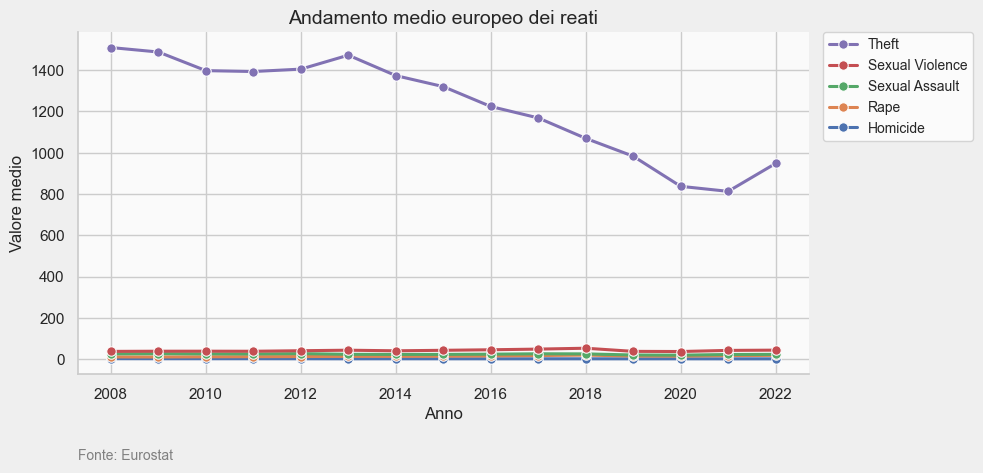

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Simulazione dei dati per combinazione
dfs = [
    (df_homicide, 'Homicide'),
    (df_rape, 'Rape'),
    (df_sexual_assault, 'Sexual Assault'),
    (df_sexual_violence, 'Sexual Violence'),
    (df_theft, 'Theft')
]

# Combina i dati in un unico DataFrame
dfs_combined = []
for df, label in dfs:
    df_mean = df.dropna(subset=['OBS_VALUE']).groupby('TIME_PERIOD', as_index=False)['OBS_VALUE'].mean()
    df_mean['Type'] = label  # Aggiungi una colonna per il tipo di reato
    dfs_combined.append(df_mean)

combined_data = pd.concat(dfs_combined, ignore_index=True)

# Configura lo stile di Seaborn
sns.set(style="whitegrid")

# Creazione del grafico
plt.figure(figsize=(10, 5))
sns.lineplot(
    data=combined_data, 
    x='TIME_PERIOD', 
    y='OBS_VALUE', 
    hue='Type',
    marker='o',
    linewidth=2.2, markersize=6.8
)

# Personalizzazione degli assi e titolo
plt.title('Andamento medio europeo dei reati', fontsize=14)
plt.xlabel('Anno', fontsize=12)
plt.ylabel('Valore medio', fontsize=12)

# Ordine personalizzato della legenda
custom_legend_order = ['Theft', 'Sexual Violence', 'Sexual Assault', 'Rape', 'Homicide']
handles, labels = plt.gca().get_legend_handles_labels()
sorted_handles_labels = sorted(zip(handles, labels), key=lambda x: custom_legend_order.index(x[1]))
handles, labels = zip(*sorted_handles_labels)
plt.legend(
    handles,
    labels,
    loc='upper left',
    bbox_to_anchor=(1.02, 1),
    borderaxespad=0,
    fontsize=10
)

# Migliora il layout visivo
plt.grid(True)
ax = plt.gca()
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

# Colori di sfondo
plt.gcf().set_facecolor("#efefef")
plt.gca().set_facecolor("#fafafa")

# Aggiungi la fonte
plt.text(
    0, -0.25,  # Posizione
    "Fonte: Eurostat",
    fontsize=10,
    color='gray',
    ha='left', 
    transform=plt.gca().transAxes
)

# Migliora il layout e mostra il grafico
plt.tight_layout()
plt.show()


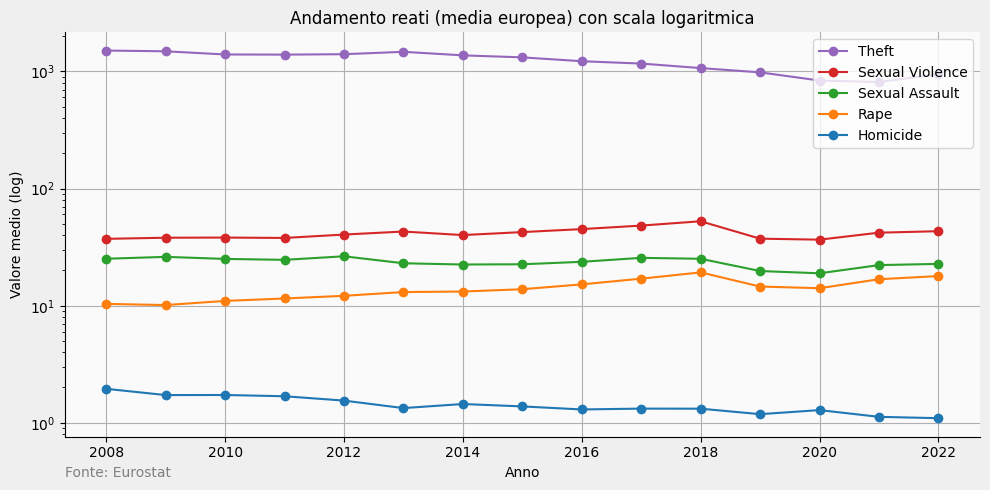

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

dfs = [
    (df_homicide, 'Homicide'),
    (df_rape, 'Rape'),
    (df_sexual_assault, 'Sexual Assault'),
    (df_sexual_violence, 'Sexual Violence'),
    (df_theft, 'Theft')
]

plt.figure(figsize=(10,5))
for df, label in dfs:
    df_mean = df.dropna(subset=['OBS_VALUE']).groupby('TIME_PERIOD', as_index=False)['OBS_VALUE'].mean().sort_values('TIME_PERIOD')
    plt.plot(df_mean['TIME_PERIOD'], df_mean['OBS_VALUE'], marker='o', label=label)

plt.yscale('log')
plt.title('Andamento reati (media europea) con scala logaritmica')
plt.xlabel('Anno')
plt.ylabel('Valore medio (log)')
plt.grid(True)

custom_legend_order = ['Theft', 'Sexual Violence', 'Sexual Assault', 'Rape', 'Homicide' ]
handles, labels = plt.gca().get_legend_handles_labels()
sorted_handles_labels = sorted(zip(handles, labels), key=lambda x: custom_legend_order.index(x[1]))
handles, labels = zip(*sorted_handles_labels)
plt.legend(handles, labels)

plt.tight_layout()

ax = plt.gca()
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

plt.text(
    0, -0.1,  # Posizione
    "Fonte: Eurostat",
    fontsize=10,
    color='gray',
    ha='left',  # Allineamento orizzontale
    transform=plt.gca().transAxes  # Posiziona il testo in coordinate relative al grafico
)

plt.gcf().set_facecolor("#efefef")
plt.gca().set_facecolor("#fafafa")
plt.show()


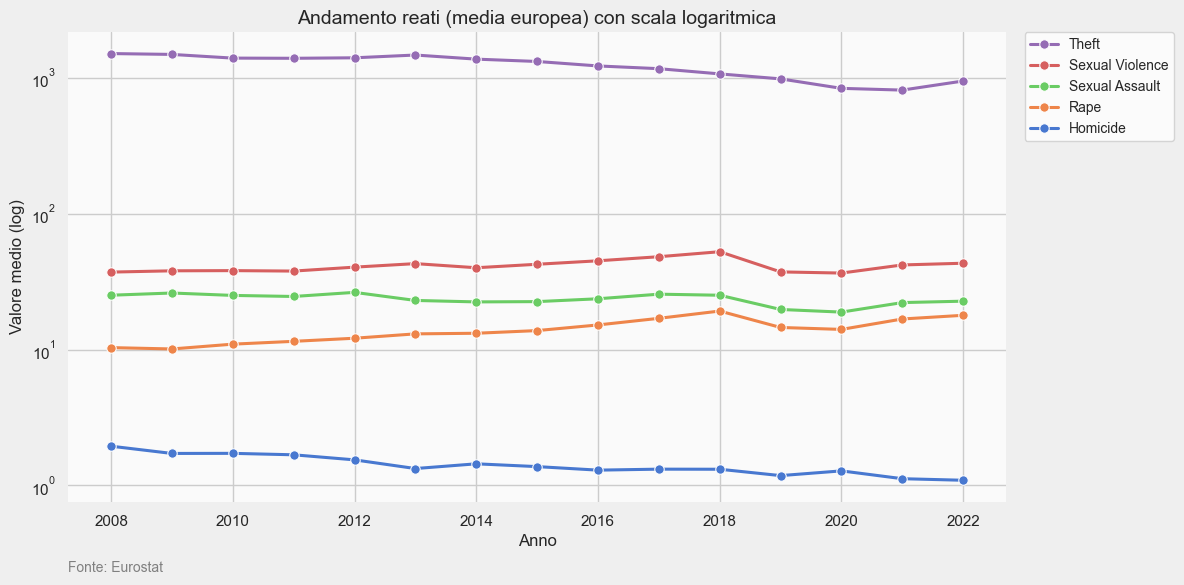

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Simulazione dei dati combinati
dfs = [
    (df_homicide, 'Homicide'),
    (df_rape, 'Rape'),
    (df_sexual_assault, 'Sexual Assault'),
    (df_sexual_violence, 'Sexual Violence'),
    (df_theft, 'Theft')
]

# Combina i dati in un unico DataFrame
dfs_combined = []
for df, label in dfs:
    df_mean = df.dropna(subset=['OBS_VALUE']).groupby('TIME_PERIOD', as_index=False)['OBS_VALUE'].mean()
    df_mean['Type'] = label  # Aggiungi una colonna per il tipo di reato
    dfs_combined.append(df_mean)

combined_data = pd.concat(dfs_combined, ignore_index=True)

# Configura lo stile di Seaborn
sns.set(style="whitegrid")

# Creazione del grafico
plt.figure(figsize=(12, 6))
sns.lineplot(data=combined_data, x='TIME_PERIOD', y='OBS_VALUE', hue='Type', marker='o', palette='muted',linewidth=2.2, markersize=6.8)

# Configura la scala logaritmica
plt.yscale('log')

# Aggiungi titolo e etichette degli assi
plt.title('Andamento reati (media europea) con scala logaritmica', fontsize=14)
plt.xlabel('Anno', fontsize=12)
plt.ylabel('Valore medio (log)', fontsize=12)

# Ordine personalizzato della legenda
custom_legend_order = ['Theft', 'Sexual Violence', 'Sexual Assault', 'Rape', 'Homicide']
handles, labels = plt.gca().get_legend_handles_labels()
sorted_handles_labels = sorted(zip(handles, labels), key=lambda x: custom_legend_order.index(x[1]))
handles, labels = zip(*sorted_handles_labels)

# Posiziona la legenda a destra e allineata in alto
plt.legend(
    handles,
    labels,
    loc='upper left',
    bbox_to_anchor=(1.02, 1),
    borderaxespad=0,
    fontsize=10
)

# Migliora lo stile del grafico
plt.grid(True)
ax = plt.gca()
for spine in ['top', 'right', 'bottom', 'left']:
    ax.spines[spine].set_visible(False)

# Aggiungi la fonte al grafico
plt.text(
    0, -0.15,  # Posizione
    "Fonte: Eurostat",
    fontsize=10,
    color='gray',
    ha='left',  # Allineamento orizzontale
    transform=plt.gca().transAxes  # Posiziona il testo in coordinate relative al grafico
)

plt.gcf().set_facecolor("#efefef")
plt.gca().set_facecolor("#fafafa")

# Migliora il layout per evitare sovrapposizioni
plt.tight_layout()

# Mostra il grafico
plt.show()

